In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = r"C:\Users\Admin\Machine Learning Fundamentals\CSV_files\MLData.xlsx"
data = pd.read_excel(file_path)

#drop the column 'DA_Concentration' because it is null
data = data.drop(columns=['DA concentration'])

#show the information of the data
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DA Concentration (uM)  48 non-null     int64  
 1   AA Concentration (uM)  48 non-null     int64  
 2   Peak Current (uA)      48 non-null     float64
 3   Peak Potential (mV)    48 non-null     float64
 4   Peak Area (uC)         48 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.0 KB
None


,DA Concentration (uM),AA Concentration (uM),Peak Current (uA),Peak Potential (mV),Peak Area (uC)
0,0,0,0.000,0.000,0.000
1,10,0,2.333,34.772,3.916
2,15,0,3.090,41.093,5.268
3,25,0,5.199,47.659,8.317
4,50,0,8.123,60.585,16.010


In [9]:
# Split the data into features and target. our target is 'DA concentration' and rest are features variables
X = data.drop(columns=['DA Concentration (uM)'])
y = data['DA Concentration (uM)']

#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.head()

,AA Concentration (uM),Peak Current (uA),Peak Potential (mV),Peak Area (uC)
8,0,42.424,130.687,184.784
3,0,5.199,47.659,8.317
6,0,31.943,99.526,82.745
39,400,71.864,283.396,350.589
33,100,36.050,185.557,105.851


In [20]:
y_train.head()

8     300
3      25
6     150
39    400
33    100
Name: DA Concentration (uM), dtype: int64

In [21]:
X_test.head()

,AA Concentration (uM),Peak Current (uA),Peak Potential (mV),Peak Area (uC)
27,1250,84.476,262.203,637.726
40,400,99.239,230.949,374.676
26,1000,72.979,243.831,559.234
43,100,18.468,135.564,55.792
24,800,60.587,238.648,434.062


In [10]:
# Standardize (normalize) the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the scaled training features and the target values
X_train_scaled[:5], y_train[:5]

(array([[-0.6162947 , -0.23973094, -0.52649663, -0.32835968],
        [-0.6162947 , -1.11854929, -1.51454202, -0.80578977],
        [-0.6162947 , -0.48716935, -0.8973171 , -0.6044254 ],
        [ 0.01135551,  0.45529693,  1.29076289,  0.12022446],
        [-0.45938214, -0.39021013,  0.12646443, -0.5419123 ]]),
 8     300
 3      25
 6     150
 39    400
 33    100
 Name: DA Concentration (uM), dtype: int64)

In [13]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVR model with RBF kernel (you can experiment with other kernels like 'linear' or 'poly')
svr_model = SVR(kernel='rbf', C=100, gamma=1, epsilon=1)

# run the SVR model on the training data
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test_scaled)

# error/loss calculation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

print(f"Predicted values: {y_pred[:5]}")
print(f"Actual values: {y_test[:5].values}")


Mean Squared Error: 19680.00342537516
R^2 Score: 0.6920187257374779
Predicted values: [ 89.44667003 289.96453785 109.9787499   36.56651381  89.87610307]
Actual values: [  0 600   0  50   0]


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['rbf', 'poly']
}

# Initialize the SVR model
svr = SVR()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Predict using the best estimator
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test_scaled)


Best hyperparameters: {'C': 100, 'epsilon': 1, 'gamma': 1, 'kernel': 'rbf'}


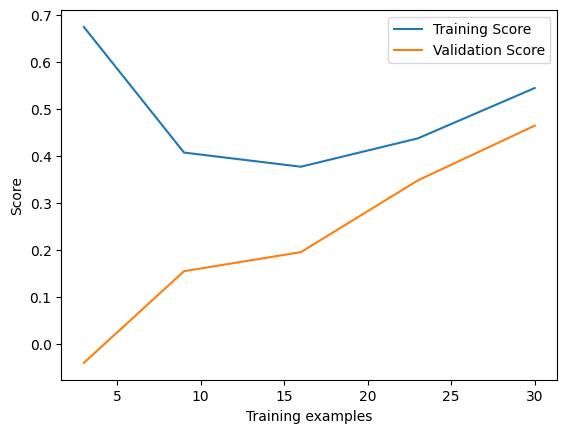

In [19]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(best_svr, X_train_scaled, y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
